In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [ ]:
data = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
data.columns

In [2]:
data = data.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6",
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "favorite_1",
    "Unnamed: 10": "favorite_2",
    "Unnamed: 11": "favorite_3",
    "Unnamed: 12": "favorite_4",
    "Unnamed: 13": "favorite_5",
    "Unnamed: 14": "favorite_6",
    "Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.": "Han Solo",
    "Unnamed: 16": "Luke Skywalker",
    "Unnamed: 17": "Princess Leia Organa",
    "Unnamed: 18": "Anakin Skywalker",
    "Unnamed: 19": "Obi Wan Kenobi",
    "Unnamed: 20": "Emperor Palpatine",
    "Unnamed: 21": "Darth Vader",
    "Unnamed: 22": "Lando Calrissian",
    "Unnamed: 23": "Boba Fett",
    "Unnamed: 24": "C-3PO",
    "Unnamed: 25": "R2-D2",
    "Unnamed: 26": "Jar Jar Binks",
    "Unnamed: 27": "Padme Anidala",
    "Unnamed: 28": "Yoda"
})

data.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'favorite_1', 'favorite_2', 'favorite_3', 'favorite_4', 'favorite_5',
       'favorite_6', 'Han Solo', 'Luke Skywalker', 'Princess Leia Organa',
       'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
       'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3PO', 'R2-D2',
       'Jar Jar Binks', 'Padme Anidala', 'Yoda', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
      dtype='object')

In [3]:
# Clean yes-no questions response data
yes_no = {"Yes": True, "No": False, True: True, False: False}

for column in [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?",
    "Are you familiar with the Expanded Universe?",
    "Do you consider yourself to be a fan of the Expanded Universe?",
    "Do you consider yourself to be a fan of the Star Trek franchise?"
]:
    data[column] = data[column].map(yes_no, na_action="ignore")

data["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False)

Have you seen any of the 6 films in the Star Wars franchise?
True     936
False    250
NaN        1
Name: count, dtype: int64

In [ ]:
# Clean the 'movies seen' columns
movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    True: True,
    False: False,
    np.nan: False
}

for column in data.columns[3:9]:
    data[column] = data[column].map(movie_mapping)


In [ ]:
# Clean the character liking data
liking_mapping = {
    "Very favorably": 2,
    "Somewhat favorably": 1,
    "Neither favorably nor unfavorably (neutral)": 0,
    "Somewhat unfavorably": -1,
    "Very unfavorably": -2
}

for column in data.columns[15:29]:
    data[column] = data[column].map(liking_mapping)

In [6]:
# Clean the data from non-numeric items
for column in data.columns[9:15]:
    data[column] = pd.to_numeric(data[column], errors="coerce")

## Analysis

### Average Ranking by Gender and Amount of Respondents by Gender

In [7]:
males = data[data["Gender"] == "Male"]
females = data[data["Gender"] == "Female"]

mean_males = males[males.columns[9:15]].mean()
mean_females = females[females.columns[9:15]].mean()

males_tot_seen = males[males.columns[3:9]].sum()
females_tot_seen = females[females.columns[3:9]].sum()

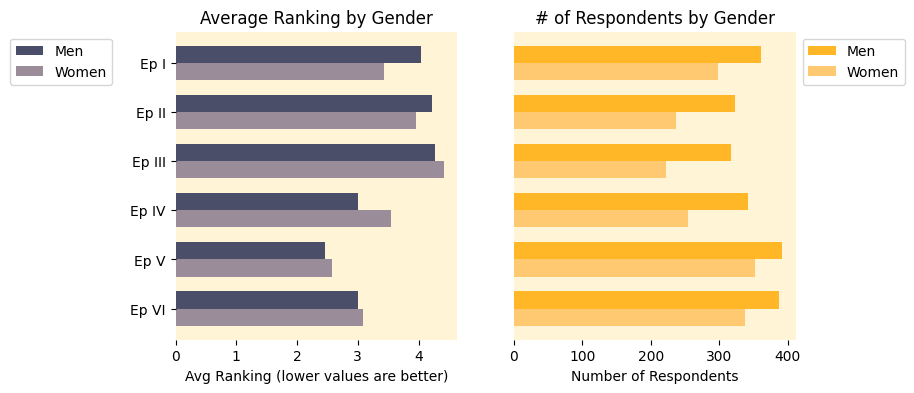

In [8]:
ind = np.arange(6)
height = 0.35
offset = ind + height

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

malebar = ax[0].barh(ind, mean_males, color="#4a4e69", height=height)
femalebar = ax[0].barh(offset, mean_females, color="#9a8c98", height=height)
ax[0].set_title("Average Ranking by Gender")
ax[0].set_yticks(ind + height / 2)
ax[0].set_yticklabels((
    "Ep I",
    "Ep II",
    "Ep III",
    "Ep IV",
    "Ep V",
    "Ep VI"
))
ax[0].set_facecolor("#fff4d6")
ax[0].set_xlabel("Avg Ranking (lower values are better)")

ax[0].legend((malebar[0], femalebar[0]), ("Men", "Women"), bbox_to_anchor=[-0.2, 1])
ax[0].invert_yaxis()

maleseenbar = ax[1].barh(ind, males_tot_seen, color="#ffb627", height=height)
femaleseenbar = ax[1].barh(offset, females_tot_seen, color="#ffc971", height=height)
ax[1].set_title("# of Respondents by Gender")
ax[1].set_yticks([])
ax[1].set_facecolor("#fff4d6")
ax[1].set_xlabel("Number of Respondents")

ax[1].legend((maleseenbar[0], femaleseenbar[0]), ("Men", "Women"), bbox_to_anchor=[1, 1])
ax[1].invert_yaxis()


for a in ax:
    for spine in ["top", "right", "bottom", "left"]:
        a.spines[spine].set_visible(False)

plt.show()

### Likeability of Each Character

In [9]:
likeability = data[data.columns[15:29]].mean()

min_value = likeability.min()
if min_value < 0:
    likeability += abs(min_value) + 0.02  # Add a negligigble value to show a very short line at the least liked character

likeability = likeability.sort_values(ascending=False)

likeability

Han Solo                1.911091
Obi Wan Kenobi          1.871527
Yoda                    1.869003
Luke Skywalker          1.819707
R2-D2                   1.808613
Princess Leia Organa    1.794387
C-3PO                   1.643042
Anakin Skywalker        1.014717
Lando Calrissian        0.876006
Padme Anidala           0.843717
Darth Vader             0.718268
Boba Fett               0.596454
Emperor Palpatine       0.310530
Jar Jar Binks           0.020000
dtype: float64

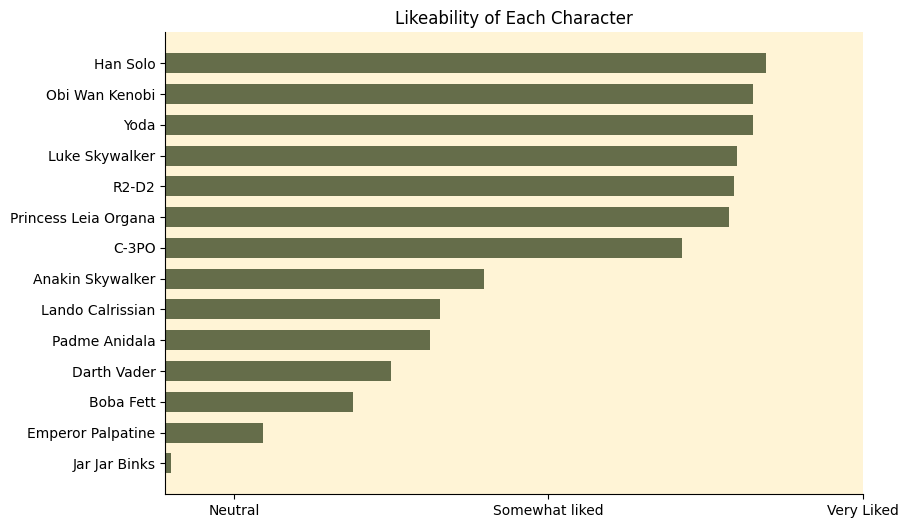

In [10]:
ind = np.arange(14)
height = 0.65

fig, ax = plt.subplots(figsize=(9,6))

ax.barh(ind, likeability, color="#656d4a", height=height)
ax.set_title("Likeability of Each Character")
ax.set_xticks([abs(min_value), abs(min_value) + 1, abs(min_value) + 2])
ax.set_xticklabels(("Neutral", "Somewhat liked", "Very Liked"))
ax.set_yticks(ind)
ax.set_yticklabels(likeability.index)
ax.set_facecolor("#fff4d6")

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
ax.invert_yaxis()